In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.cm as cm
from matplotlib.cm import viridis

In [3]:
df = pd.read_csv(".\CSV Test\Wines recommended.csv")
del df['name.1']
del df['wine_name']
del df['id']

In [4]:
df.corr()

,ratings_average,ratings_count,price_euros
ratings_average,1.000000,0.147362,0.820170
ratings_count,0.147362,1.000000,-0.103126
price_euros,0.820170,-0.103126,1.000000


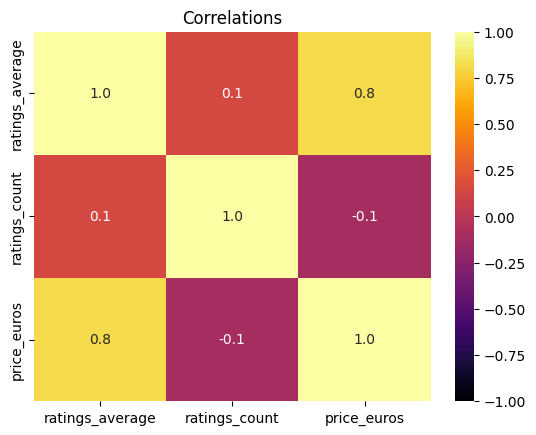

In [5]:
corr_matrix = df.corr()
corr_matrix_np = corr_matrix.values
np.fill_diagonal(corr_matrix_np, 1)
corr_matrix = pd.DataFrame(corr_matrix_np, index=corr_matrix.index, columns=corr_matrix.columns)

sns.heatmap(corr_matrix, annot=True, cmap="inferno", vmax=1, vmin=-1, fmt='.1f')
plt.title("Correlations")
plt.show()

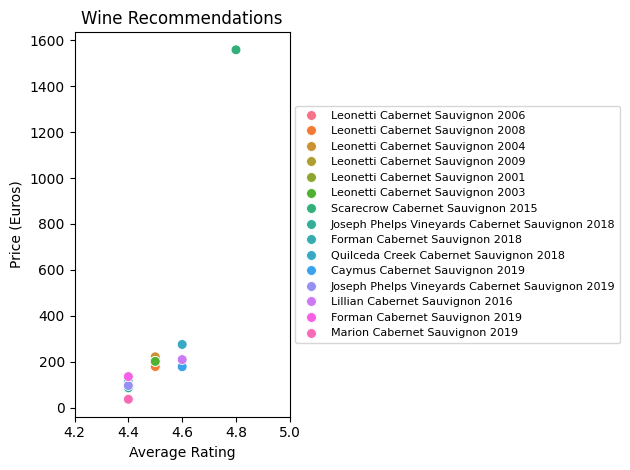

In [6]:
df = pd.read_csv("./CSV Test/Wines recommended.csv")

# Crear el gráfico de dispersión y capturar el objeto de los ejes
ax = sns.scatterplot(x="ratings_average", y="price_euros", data=df, color='purple', s=50, hue = 'name.1')  # Cambia 'purple' por cualquier color o paleta que desees

# Configurar el título y las etiquetas de los ejes

ax.set_title("Wine Recommendations")  # Cambiado de "Recommended Wines"
ax.set_xlabel("Average Rating")  # Cambiado de "Rating Average"
ax.set_ylabel("Price (Euros)")  # Etiqueta del eje y
ax.set_xticks([4.2, 4.4, 4.6, 4.8, 5])
# Mostrar la gráfica
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8) 
plt.tight_layout()
plt.show()


In [7]:
df = pd.read_csv('./CSV Test/country_ratings.csv')

In [8]:
##df = df.set_index('country')

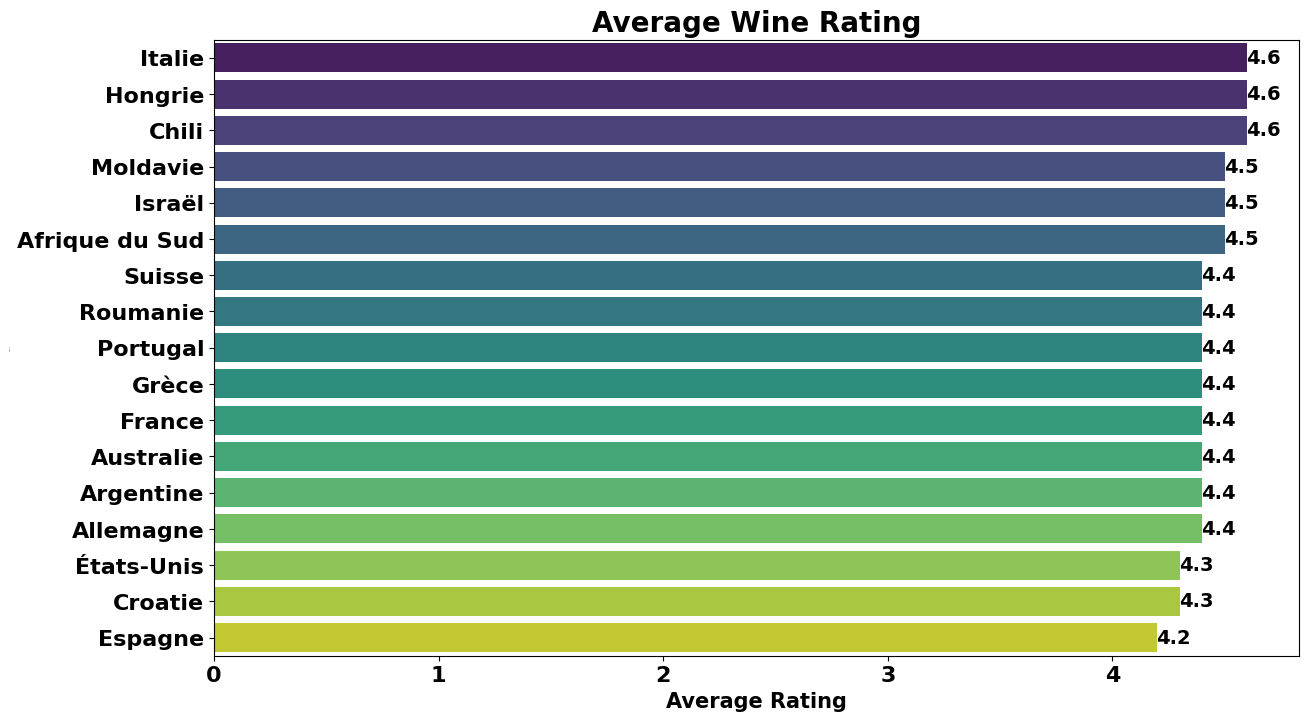

In [9]:
fig, ax = plt.subplots(figsize=(14, 8))


sns.barplot(x='avg_wine_rating', y='country', data=df, palette='viridis', hue='country', ax=ax, legend=False)


ax.set_title('Average Wine Rating', fontsize=20, fontweight="bold")
ax.set_xlabel('Average Rating',fontsize=15, fontweight="bold")  # Adding x-axis label
ax.set_ylabel('Country', fontsize=1)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(fontsize=16, fontweight="bold") 
plt.xticks(fontsize=16, fontweight="bold")
for index, value in enumerate(df['avg_wine_rating']):
    plt.text(x=value - 0.005, y=index, s=f'{value}', color='black', fontsize=14, va='center', fontweight='bold')

plt.show()

In [10]:
df1 = pd.read_csv('./CSV/6-2_vintages_wineratings.csv')

In [11]:
df1 = df1.set_index('vintages')

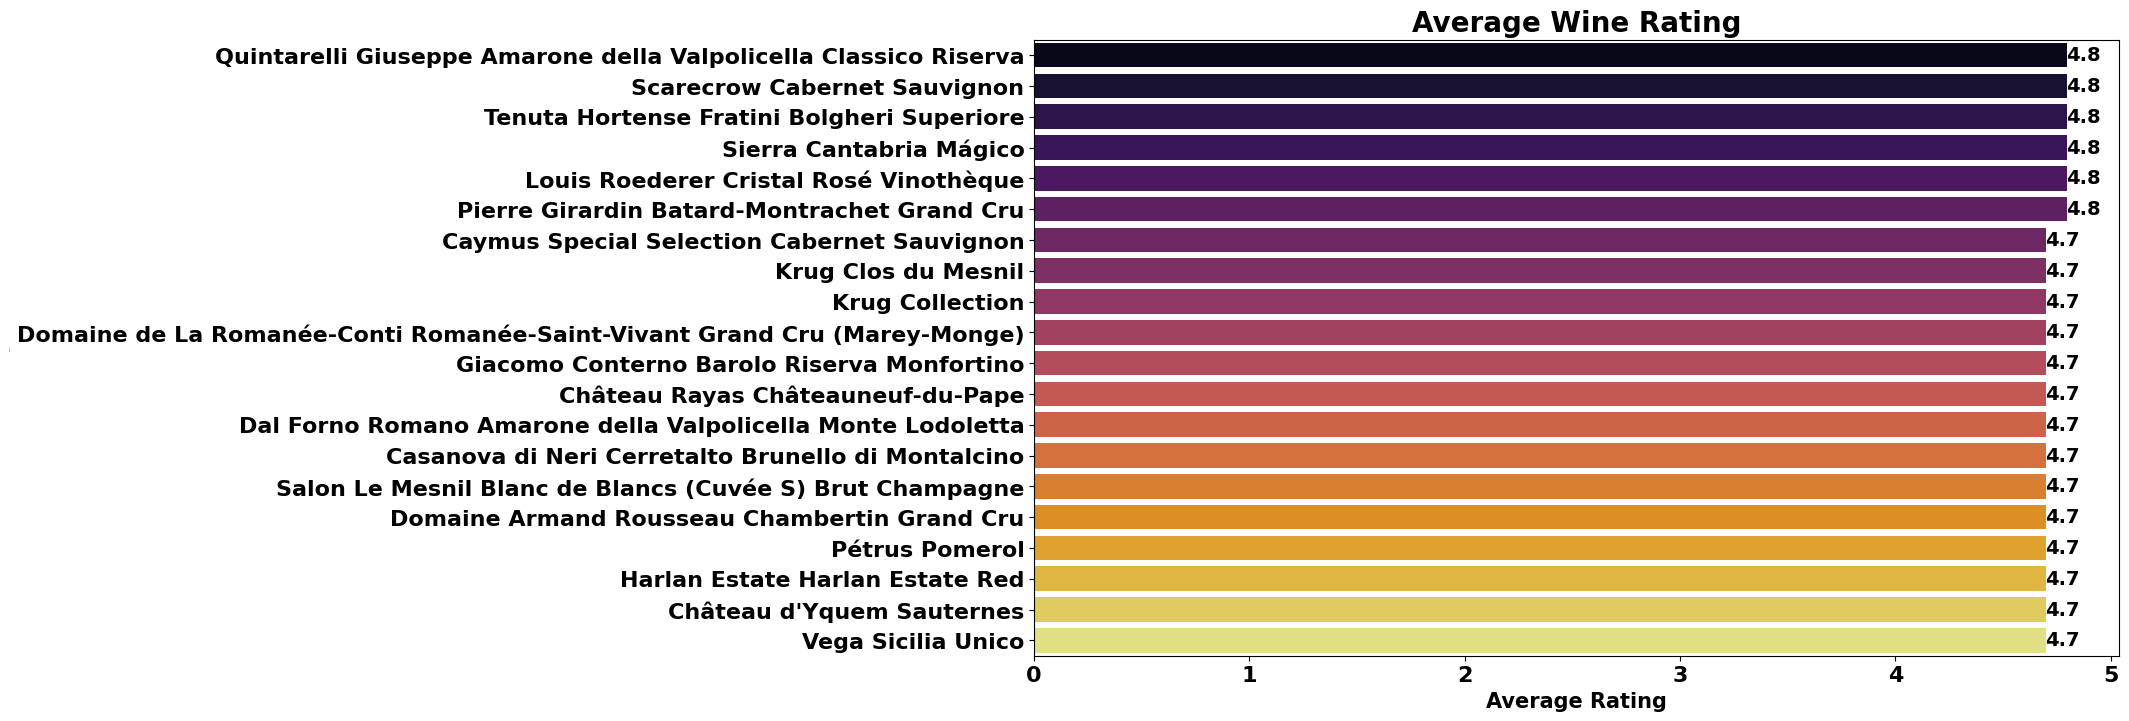

In [12]:
fig, ax = plt.subplots(figsize=(14, 8))

# Create the barplot
sns.barplot(x='avg_wine_rating', y='vintages', data=df1, palette='inferno', hue='vintages', ax=ax, legend=False)

# Set the title and axis labels
ax.set_title('Average Wine Rating', fontsize=20, fontweight="bold")
ax.set_xlabel('Average Rating',fontsize=15, fontweight="bold")  # Adding x-axis label
ax.set_ylabel('Country', fontsize=1)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(fontsize=16, fontweight="bold") 
plt.xticks(fontsize=16, fontweight="bold")
for index, value in enumerate(df1['avg_wine_rating']):
    plt.text(x=value - 0.005, y=index, s=f'{value}', color='black', fontsize=14, va='center', fontweight='bold')
# Display the plot
plt.show()

In [13]:
df2= pd.read_csv('./CSV/5_best_rated_wines_most_common_grapes.csv')

In [14]:
fig = go.Figure(data=[go.Scatter(
    x=df2['grape_name'],
    y=df2['wine_name'],
    mode='markers',
    text=df2['ratings_average'],  
   
    marker=dict(
        color=df2['price'],  
        size=[10 + i * 5 for i in range(len(df2['grape_name']))],  
        showscale=True, 
        colorbar=dict(
            title='Ratings_average'  
        ),
       
        colorscale='Viridis',  
        colorbar_title='Price'  
    )
)])

fig.update_layout(
    xaxis=dict(
        title='Grape Name',
        title_font=dict(size=16, family='Arial, sans-serif', color='black'),
        tickfont=dict(size=16, family='Arial, sans-serif', color='black')
       
    ),
   
    
)

fig.show()